In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Final_Game_df.xlsx')

In [3]:
df = pd.get_dummies(df,columns=['Away Team'],drop_first=True,prefix='A')

In [4]:
df = pd.get_dummies(df,columns=['Home Team'],drop_first=True,prefix='H')

In [5]:
df = df = pd.get_dummies(df,columns=['Year'],drop_first=True,prefix='Y')

In [6]:
df.drop('Home Score_x_x', axis=1, inplace=True)

In [7]:
df.drop('Date', axis=1, inplace=True)

In [8]:
pd.set_option('Max_columns',None)
pd.set_option('Max_rows',None)

In [9]:
df.dtypes

Home Team Ranking_x                                                int64
Away Team Ranking_x                                                int64
Home Team Spread_x                                               float64
Away Team Spread_x                                               float64
Total_x                                                          float64
Away Score_x_x                                                     int64
Rolling 5 Past Away Score                                        float64
Rolling 5 Past Away Score Avg                                    float64
Rolling 5 Past Away Score Max                                    float64
Rolling 5 Past Away Score Min                                    float64
Rolling 3 Past Away Score                                        float64
Rolling 3 Past Away Score Avg                                    float64
Rolling 3 Past Away Score Max                                    float64
Rolling 3 Past Away Score Min                      

In [10]:
df.shape

(997, 1631)

In [11]:
df.isnull().sum().max()

75

# 4.6 Train/Test Split

In [12]:
len(df) * .7, len(df) * .3

(697.9, 299.09999999999997)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Away Score_x_x'), 
                                                    df['Away Score_x_x'], test_size=0.3, 
                                                    random_state=42)

In [14]:
X_train.head()

Home Team Ranking_x  Away Team Ranking_x  Home Team Spread_x  \
842                   99                    3                24.0   
630                   23                   99               -11.0   
394                   99                   99                -7.5   
929                   99                   21                 7.0   
598                   10                    4                 1.5   

     Away Team Spread_x  Total_x  Rolling 5 Past Away Score  \
842               -24.0     57.5                      102.0   
630                11.0     51.0                       91.0   
394                 7.5     48.0                       95.0   
929                -7.0     47.0                        NaN   
598                -1.5     41.5                      130.0   

     Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
842                           20.4                           25.0   
630                           18.2                           36.0   
394                           19.0                           28.0   
929                            NaN                            NaN   
598                           26.0                           52.0   

     Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
842                           17.0                       63.0   
630                            7.0                       57.0   
394                           10.0                       65.0   
929                            NaN                       90.0   
598                            9.0                       73.0   

     Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
842                      21.000000                           25.0   
630                      19.000000                           36.0   
394                      21.666667                           28.0   
929                      30.000000                           35.0   
598                      24.333333                           52.0   

     Rolling 3 Past Away Score Min  Past Away Score  \
842                           17.0             25.0   
630                            7.0              7.0   
394                           13.0             13.0   
929                           21.0             21.0   
598                            9.0             12.0   

     Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
842                             861.0                                 172.2   
630                             833.0                                 166.6   
394                             815.0                                 163.0   
929                               NaN                                   NaN   
598                             675.0                                 135.0   

     Rolling 5 Past Away HI Pass yrds Max  \
842                                 237.0   
630                                 327.0   
394                                 233.0   
929                                   NaN   
598                                 213.0   

     Rolling 5 Past Away HI Pass yrds Min  Rolling 3 Past Away HI Pass yrds  \
842                                 107.0                             544.0   
630                                  80.0                             396.0   
394                                  66.0                             577.0   
929                                   NaN                             710.0   
598                                  67.0                             324.0   

     Rolling 3 Past Away HI Pass yrds Avg  \
842                            181.333333   
630                            132.000000   
394                            192.333333   
929                            236.666667   
598                            108.000000   

     Rolling 3 Past Away HI Pass yrds Max  \
842                                 237.0   
630                                 177.0   
394                             

In [15]:
X_train.shape

(697, 1630)

In [16]:
X_test.head()

Home Team Ranking_x  Away Team Ranking_x  Home Team Spread_x  \
453                   99                   99                 3.0   
792                   15                   99                -6.5   
209                   99                    9                 4.0   
309                   99                   99                -7.0   
739                    4                    1                10.0   

     Away Team Spread_x  Total_x  Rolling 5 Past Away Score  \
453                -3.0     53.0                       78.0   
792                 6.5     40.5                      158.0   
209                -4.0     44.5                      154.0   
309                 7.0     43.5                      109.0   
739               -10.0     46.0                      202.0   

     Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
453                           15.6                           30.0   
792                           31.6                           52.0   
209                           30.8                           47.0   
309                           21.8                           35.0   
739                           40.4                           51.0   

     Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
453                            0.0                       37.0   
792                           14.0                       99.0   
209                           13.0                       94.0   
309                           16.0                       76.0   
739                           30.0                      121.0   

     Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
453                      12.333333                           30.0   
792                      33.000000                           52.0   
209                      31.333333                           37.0   
309                      25.333333                           35.0   
739                      40.333333                           42.0   

     Rolling 3 Past Away Score Min  Past Away Score  \
453                            0.0              0.0   
792                           14.0             14.0   
209                           28.0             28.0   
309                           17.0             35.0   
739                           38.0             41.0   

     Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
453                             796.0                                 159.2   
792                            1420.0                                 284.0   
209                            1159.0                                 231.8   
309                            1020.0                                 204.0   
739                             891.0                                 178.2   

     Rolling 5 Past Away HI Pass yrds Max  \
453                                 274.0   
792                                 397.0   
209                                 310.0   
309                                 264.0   
739                                 304.0   

     Rolling 5 Past Away HI Pass yrds Min  Rolling 3 Past Away HI Pass yrds  \
453                                  84.0                             281.0   
792                                 249.0                             905.0   
209                                 172.0                             768.0   
309                                 109.0                             690.0   
739                                  96.0                             491.0   

     Rolling 3 Past Away HI Pass yrds Avg  \
453                             93.666667   
792                            301.666667   
209                            256.000000   
309                            230.000000   
739                            163.666667   

     Rolling 3 Past Away HI Pass yrds Max  \
453                                 110.0   
792                                 397.0   
209                             

In [17]:
X_test.shape

(300, 1630)

In [18]:
y_train.head()

842    30
630    23
394    14
929    34
598     6
Name: Away Score_x_x, dtype: int64

In [19]:
y_train.shape

(697,)

In [20]:
y_test.head()

453    23
792    12
209    38
309    27
739    13
Name: Away Score_x_x, dtype: int64

In [21]:
y_test.shape

(300,)

In [22]:
train_mean = y_train.mean()
train_mean

24.51219512195122

In [23]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[24.51219512]])

# 4.7.1 Metrics 

4.7.1.1 R-squared, or coefficient of determination

In [24]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 -  sum_sq_res / sum_sq_tot
    return R2

In [25]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([24.51219512, 24.51219512, 24.51219512, 24.51219512, 24.51219512])

In [26]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([24.51219512, 24.51219512, 24.51219512, 24.51219512, 24.51219512])

In [27]:
r_squared(y_train, y_tr_pred)

0.0

In [28]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.00022266832896566946

# 4.7.1.2 Mean Absolute Error
#This is very simply the average of the absolute errors:

In [29]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(ypred - y)
    mae = np.mean(abs_error)
    return mae

In [30]:
mae(y_train, y_tr_pred)

11.629562235364144

In [31]:
mae(y_test, y_te_pred)

11.258455284552843

In [32]:
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (ypred - y)**2
    mse = np.mean(sq_error)
    return mse

In [33]:
mse(y_train, y_tr_pred)

209.07911957168366

In [34]:
mse(y_test, y_te_pred)

195.9549454689668

In [35]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([14.45956844, 13.99839082])

# 4.7.1.3 Mean Squared Error
Another common metric (and an important one internally for optimizing machine learning models) is the mean squared error. This is simply the average of the square of the errors:

In [36]:
#Code task 8#
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (ypred - y)**2
    mse = np.mean(sq_error)
    return mse

In [37]:
mse(y_train, y_tr_pred)

209.07911957168366

In [38]:
mse(y_test, y_te_pred)

195.9549454689668

In [39]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([14.45956844, 13.99839082])

# 4.7.2 sklearn metrics
Functions are good, but you don't want to have to define functions every time we want to assess performance. sklearn.metrics provides many commonly used metrics, included the ones above.

In [40]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.00022266832896566946)

In [41]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(11.629562235364105, 11.258455284552845)

In [42]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(209.07911957168355, 195.95494546896688)

# 4.7.3 Note On Calculating Metrics
When calling functions to calculate metrics, it is important to take care in the order of the arguments. Two of the metrics above actually don't care if the arguments are reversed; one does. Which one cares?

In a Jupyter code cell, running r2_score? will bring up the docstring for the function, and r2_score?? will bring up the actual code of the function! Try them and compare the source for sklearn's function with yours. Feel free to explore what happens when you reverse the order of the arguments and compare behaviour of sklearn's function and yours.

In [43]:
# train set - sklearn
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, -1.84055049597385e+30)

In [44]:
# test set - sklearn
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.00022266832896566946, -1.5525150265089114e+31)

In [45]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)


(0.0, -1.84055049597385e+30)

In [46]:
# test set - using our homebrew function
# correct order, incorrect order
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

(-0.00022266832896566946, -1.5525150265089114e+31)

# 4.8 Initial Models
4.8.1 Imputing missing feature (predictor) values
Recall when performing EDA, you imputed (filled in) some missing values in pandas. You did this judiciously for exploratory/visualization purposes. You left many missing values in the data. You can impute missing values using scikit-learn, but note that you should learn values to impute from a train split and apply that to the test split to then assess how well your imputation worked.

4.8.1.1 Impute missing values with median
There's missing values. Recall from your data exploration that many distributions were skewed. Your first thought might be to impute missing values using the median.

4.8.1.1.1 Learn the values to impute from the train set

In [47]:
# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

Home Team Ranking_x                                                99.000000
Away Team Ranking_x                                                99.000000
Home Team Spread_x                                                 -3.000000
Away Team Spread_x                                                  3.000000
Total_x                                                            51.000000
Rolling 5 Past Away Score                                         117.000000
Rolling 5 Past Away Score Avg                                      23.400000
Rolling 5 Past Away Score Max                                      40.000000
Rolling 5 Past Away Score Min                                      10.000000
Rolling 3 Past Away Score                                          71.000000
Rolling 3 Past Away Score Avg                                      23.666667
Rolling 3 Past Away Score Max                                      34.000000
Rolling 3 Past Away Score Min                                      13.000000

In [48]:
#Code task 9#
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [49]:
#Code task 10#
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

# 4.8.1.1.4 Train the model on the train split

In [50]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [51]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [52]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(1.0, -1.7688655370692028)

In [53]:
#Code task 12#
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(8.490832777827653e-14, 17.572420660261646)

In [54]:
#Code task 13#
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(1.1542196264744604e-26, 542.452108422771)

# 4.8.1.2 Impute missing values with the mean
You chose to use the median for filling missing values because of the skew of many of our predictor feature distributions. What if you wanted to try something else, such as the mean?

In [55]:
#Code task 14#
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

Home Team Ranking_x                                                60.764706
Away Team Ranking_x                                                60.037303
Home Team Spread_x                                                 -3.269727
Away Team Spread_x                                                  3.269727
Total_x                                                            52.032281
Rolling 5 Past Away Score                                         119.655814
Rolling 5 Past Away Score Avg                                      23.931163
Rolling 5 Past Away Score Max                                      39.133333
Rolling 5 Past Away Score Min                                      10.654264
Rolling 3 Past Away Score                                          71.484985
Rolling 3 Past Away Score Avg                                      23.828328
Rolling 3 Past Away Score Max                                      34.430931
Rolling 3 Past Away Score Min                                      13.849850

# 4.8.1.2.2 Apply the imputation to both train and test splits

In [56]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

# 4.8.1.2.3 Scale the data

In [57]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

# 4.8.1.2.4 Train the model on the train split

In [58]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

# .8.1.2.5 Make predictions using the model on both train and test splits

In [59]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

# 4.8.1.2.6 Assess model performance

In [60]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(1.0, -1.715224816856964)

In [61]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.88668735593313e-14, 17.365899576168403)

In [62]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(1.5773609942919742e-26, 531.943284001039)

# 4.8.2 Pipelines
One of the most important and useful components of sklearn is the pipeline. In place of panda's fillna DataFrame method, there is sklearn's SimpleImputer. Remember the first linear model above performed the steps:

# 4.8.2.1 Define the pipeline

In [63]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [64]:
type(pipe)

sklearn.pipeline.Pipeline

In [65]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [66]:
#Code task 15#
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [67]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [68]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)


(1.0, -1.7688655370692028)

In [69]:
median_r2

(1.0, -1.7688655370692028)

In [70]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.490832777827653e-14, 17.572420660261646)

In [71]:
#Compare with your earlier result:

In [72]:
median_mae

(8.490832777827653e-14, 17.572420660261646)

In [73]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(1.1542196264744604e-26, 542.452108422771)

# Compare with your earlier result:

In [74]:
median_mse

(1.1542196264744604e-26, 542.452108422771)

# 4.9 Refining The Linear Model
You suspected the model was overfitting. This is no real surprise given the number of features you blindly used. It's likely a judicious subset of features would generalize better. sklearn has a number of feature selection functions available. The one you'll use here is SelectKBest which, as you might guess, selects the k best features. You can read about SelectKBest here. f_regression is just the score function you're using because you're performing regression. It's important to choose an appropriate one for your machine learning task.

# 4.9.1 Define the pipeline
Redefine your pipeline to include this feature selection step:

In [75]:
#Code task 16#
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

# 4.9.2 Fit the pipeline

In [76]:
pipe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7f9e59529790>)),
                ('linearregression', LinearRegression())])

In [77]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [78]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.32057848636307007, 0.21474038305261367)

In [79]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.457372870481494, 9.553699033466986)

# 4.9.4 Define a new pipeline to select a different number of features

In [80]:
#Code task 17#
#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)

# 4.9.5 Fit the pipeline

In [81]:
pipe15.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7f9e59529790>)),
                ('linearregression', LinearRegression())])

# 4.9.6 Assess performance on train and test data

In [82]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [83]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.3315059615631014, 0.2356068598685016)

In [84]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.453287466983737, 9.596370283007062)

# 4.9.7 Assessing performance using cross-validation

In [85]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [86]:
cv_scores = cv_results['test_score']
cv_scores

array([0.29308518, 0.35094793, 0.21944434, 0.31135492, 0.30014028])

In [87]:
np.mean(cv_scores), np.std(cv_scores)

(0.29499452788039404, 0.042746697745862615)

In [88]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.21, 0.38])

# 4.9.8 Hyperparameter search using GridSearchCV

In [89]:
#Code task 18#
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [90]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [91]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [92]:
lr_grid_cv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f9e59529790>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [93]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [94]:
lr_grid_cv.best_params_

{'selectkbest__k': 73}

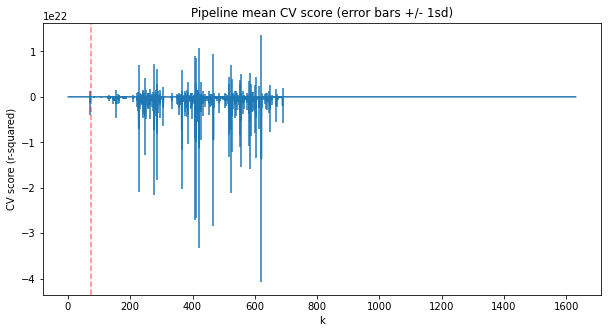

In [95]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [96]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [97]:
#Code task 21#
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Rolling 3 Past H&A Ranking_Home_Team                1.321067e+13
Rolling 3 Past H&A Score Avg_Away_Team              6.248586e+12
Rolling 3 Past Away Yards per Pass                  5.784607e+12
Rolling 5 Past H&A Total Yards_Away_Team            3.870671e+12
Rolling 5 Past Home Ranking Avg                     3.604077e+12
Rolling 5 Past H&A Season T Losses Avg_Home_Team    3.446316e+12
Rolling 3 Past H&A Conf T Losses_Home_Team          2.677297e+12
Rolling 5 Past H&A Q2 Score_Away_Team               2.597723e+12
Rolling 5 Past Home Spread                          2.078452e+12
Rolling 3 Past H&A Yards per Pass Avg_Away_Team     1.723366e+12
Rolling 5 Past H&A Spread Avg_Home_Team             1.626938e+12
Rolling 3 Past Away Total Yards Avg                 1.534923e+12
Rolling 3 Past Away Score Avg                       1.504565e+12
Rolling 5 Past H&A Conf T Losses_Home_Team          1.133970e+12
Rolling 3 Past Home Spread Avg                      1.116855e+12
Rolling 5 Past Away Total

# 4.10 Random Forest Model
A model that can work very well in a lot of cases is the random forest. For regression, this is provided by sklearn's RandomForestRegressor class.

Time to stop the bad practice of repeatedly checking performance on the test split. Instead, go straight from defining the pipeline to assessing performance using cross-validation. cross_validate will perform the fitting as part of the process. This uses the default settings for the random forest so you'll then proceed to investigate some different hyperparameters.

In [98]:
#Code task 22#
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

# 4.10.2 Fit and assess performance using cross-validation

In [99]:
#Code task 23#
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train,y_train, cv=5)

In [100]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.34383773, 0.44899425, 0.27031075, 0.33477465, 0.40924112])

In [101]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.3614316999370183, 0.06209044215170729)

In [102]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [103]:
#Code task 24#
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [104]:
#Code task 25#
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [105]:
#Code task 26#
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 143,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [106]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.36413618, 0.45479665, 0.27191201, 0.34344904, 0.41432739])

In [107]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.36972425274885506, 0.06247495691016887)

In [108]:
#Code task 27#
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
#plt.subplots(figsize=(60, 10))
#imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
#rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
#rf_feat_imps.plot(kind='bar')
#plt.xlabel('features')
#plt.ylabel('importance')
#plt.title('Best random forest regressor feature importances');

# 4.11 Final Model Selection

# 4.11.1 Linear regression model performance

In [109]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [110]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(9.424873902060863, 0.48548262861261404)

In [111]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

9.486359007591297

In [112]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [113]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(8.96214073696088, 0.47328125149495875)

In [114]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

8.368531468531467

# 4.12 Data quantity assessment

In [115]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value e

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value e

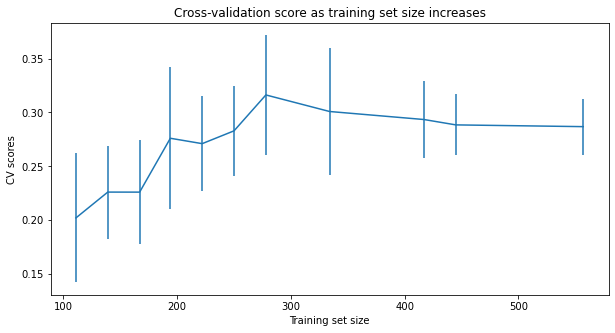

In [116]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

In [117]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_


In [118]:
best_model

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=143, random_state=47))])

# Prediction for upcoming games 10/16/21 test run

In [119]:
Upcoming_Game_df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [120]:
Upcoming_Game_df = pd.get_dummies(Upcoming_Game_df,columns=['Away Team'],drop_first=True,prefix='A')

In [121]:
Upcoming_Game_df = pd.get_dummies(Upcoming_Game_df,columns=['Home Team'],drop_first=True,prefix='H')

In [122]:
Upcoming_Game_df = pd.get_dummies(Upcoming_Game_df,columns=['Year'],drop_first=True,prefix='Y')

In [123]:
Upcoming_Game_df.drop('Home Score_x_x', axis=1, inplace=True)

In [124]:
Upcoming_Game_df.drop('Date', axis=1, inplace=True)

In [125]:
best_model.X_columns = [col for col in X_train.columns]

In [126]:
Upcoming_Game_df.head(7)

Home Team Ranking_x  Away Team Ranking_x  Home Team Spread_x  \
0                    3                    1                 6.5   
1                   99                    3                19.5   
2                   99                   15                 6.5   
3                   25                   99               -14.5   
4                   99                    9                -2.0   
5                   99                    9                -2.0   
6                   99                    9                -2.0   

   Away Team Spread_x  Total_x  Away Score_x_x  Rolling 5 Past Away Score  \
0                -6.5     49.0             NaN                      231.0   
1               -19.5     55.5            24.0                      225.0   
2                -6.5     27.0            24.0                      167.0   
3                14.5     63.0            17.0                      120.0   
4                 2.0     65.0            31.0                      151.0   
5                 2.0     65.0            31.0                      174.0   
6                 2.0     65.0            31.0                      174.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
0                           46.2                           62.0   
1                           45.0                           55.0   
2                           33.4                           48.0   
3                           24.0                           37.0   
4                           30.2                           48.0   
5                           34.8                           54.0   
6                           34.8                           54.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
0                           34.0                      137.0   
1                           31.0                      118.0   
2                           19.0                       88.0   
3                            6.0                       71.0   
4                           20.0                       82.0   
5                           20.0                       72.0   
6                           20.0                       72.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
0                      45.666667                           62.0   
1                      39.333333                           49.0   
2                      29.333333                           35.0   
3                      23.666667                           37.0   
4                      27.333333                           31.0   
5                      24.000000                           31.0   
6                      24.000000                           31.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
0                           34.0             41.0   
1                           31.0             49.0   
2                           19.0             19.0   
3                            6.0              6.0   
4                           20.0             31.0   
5                           20.0             20.0   
6                           20.0             20.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
0                            1033.0                                 206.6   
1                            1550.0                                 310.0   
2                            1086.0                                 217.2   
3                            1018.0                                 203.6   
4                            1218.0                                 243.6   
5                            1396.0                                 279.2   
6                            1396.0                                 279.2   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
0                                 299.0                                 139.0   
1                                 385.0                           

In [127]:
Upcoming_Game_df.shape

(998, 1631)

best_model.X_column = Upcoming_Game_df[[ 'Home Team Spread_x',                             
'Rolling 5 Past H&A Spread Min_Away_Team',           
'Rolling 3 Past H&A Ranking Avg_Away_Team' ,          
'Rolling 3 Past H&A Ranking_Away_Team'  ,             
'Rolling 3 Past Away Ranking' ,                       
'Rolling 3 Past Away Ranking Avg'   ,                 
'Rolling 3 Past H&A Spread Avg_Away_Team' ,           
'Rolling 3 Past H&A Spread_Away_Team'   ,            
'Rolling 5 Past H&A Total Yards_Away_Team'  ,         
'Rolling 5 Past H&A Total Yards Avg_Away_Team' ,     
'Away Team Ranking_x',                                
'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',    
'Rolling 5 Past H&A Yards per Pass_Away_Team' ,       
'Rolling 5 Past H&A Score_Away_Team',                 
'Rolling 5 Past H&A Score Avg_Away_Team' ,            
'Rolling 3 Past Away Spread',                         
'Rolling 3 Past Away Spread Avg' ,                    
'Rolling 5 Past H&A Spread Avg_Away_Team' ,           
'Rolling 5 Past H&A Spread_Away_Team' ,               
'Rolling 5 Past H&A Ranking Max_Away_Team' ,         
'Rolling 5 Past Away Ranking Max' ,                  
'Rolling 5 Past Away Spread Min',                    
'Rolling 5 Past Away Spread Avg' ,                   
'Rolling 5 Past Away Spread' ,                       
'Rolling 3 Past H&A Ranking Min_Away_Team'  ,        
'Rolling 5 Past H&A Ranking_Away_Team' ,             
'Rolling 5 Past H&A Ranking Avg_Away_Team'  ,        
'Rolling 3 Past H&A Spread Min_Away_Team',          
'Previous H&A Ranking_Away_Team' ,                   
'Rolling 3 Past Away Ranking Max' ,                  
'Away Team Spread_x' ]]                              

In [128]:
Upcoming_Game_df.head()

Home Team Ranking_x  Away Team Ranking_x  Home Team Spread_x  \
0                    3                    1                 6.5   
1                   99                    3                19.5   
2                   99                   15                 6.5   
3                   25                   99               -14.5   
4                   99                    9                -2.0   

   Away Team Spread_x  Total_x  Away Score_x_x  Rolling 5 Past Away Score  \
0                -6.5     49.0             NaN                      231.0   
1               -19.5     55.5            24.0                      225.0   
2                -6.5     27.0            24.0                      167.0   
3                14.5     63.0            17.0                      120.0   
4                 2.0     65.0            31.0                      151.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
0                           46.2                           62.0   
1                           45.0                           55.0   
2                           33.4                           48.0   
3                           24.0                           37.0   
4                           30.2                           48.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
0                           34.0                      137.0   
1                           31.0                      118.0   
2                           19.0                       88.0   
3                            6.0                       71.0   
4                           20.0                       82.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
0                      45.666667                           62.0   
1                      39.333333                           49.0   
2                      29.333333                           35.0   
3                      23.666667                           37.0   
4                      27.333333                           31.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
0                           34.0             41.0   
1                           31.0             49.0   
2                           19.0             19.0   
3                            6.0              6.0   
4                           20.0             31.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
0                            1033.0                                 206.6   
1                            1550.0                                 310.0   
2                            1086.0                                 217.2   
3                            1018.0                                 203.6   
4                            1218.0                                 243.6   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
0                                 299.0                                 139.0   
1                                 385.0                                 208.0   
2                                 281.0                                 148.0   
3                                 294.0                                  78.0   
4                                 289.0                                 213.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
0                             595.0                            198.333333   
1                             957.0                            319.000000   
2                             666.0                            222.000000   
3                             590.0                            196.666667   
4                             754.0                            251.333333   

   Rolling 3 Past Away HI Pass yrds Max  Rolling 3 Past Away HI Pass yrds Min  \
0                                 231.0                                 151.0   
1                                 369.0                   

In [129]:
#Alabama_cols=['A_Arkansas','A_Auburn','A_Florida','A_Georgia','A_Kentucky','A_LSU','A_Mississippi State','A_Missouri','A_Ole Miss','A_South Carolina','A_Tennessee','A_Texas A&M','A_Vanderbilt']

In [130]:
X = Upcoming_Game_df.loc[(Upcoming_Game_df['Away Score_x_x'] >=0) , best_model.X_columns]
y = Upcoming_Game_df.loc[(Upcoming_Game_df['Away Score_x_x'] >=0), 'Away Score_x_x']

#example - dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]

#X = Updated_Game_df.loc['Date'] != "Big Mountain Resort", model.X_columns]
#y = ski_data.loc[ski_data.Name != "Big Mountain Resort", 'AdultWeekend']

In [131]:
len(X), len(y)

(997, 997)

In [132]:
X.head()

Home Team Ranking_x  Away Team Ranking_x  Home Team Spread_x  \
1                   99                    3                19.5   
2                   99                   15                 6.5   
3                   25                   99               -14.5   
4                   99                    9                -2.0   
5                   99                    9                -2.0   

   Away Team Spread_x  Total_x  Rolling 5 Past Away Score  \
1               -19.5     55.5                      225.0   
2                -6.5     27.0                      167.0   
3                14.5     63.0                      120.0   
4                 2.0     65.0                      151.0   
5                 2.0     65.0                      174.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           45.0                           55.0   
2                           33.4                           48.0   
3                           24.0                           37.0   
4                           30.2                           48.0   
5                           34.8                           54.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           31.0                      118.0   
2                           19.0                       88.0   
3                            6.0                       71.0   
4                           20.0                       82.0   
5                           20.0                       72.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      39.333333                           49.0   
2                      29.333333                           35.0   
3                      23.666667                           37.0   
4                      27.333333                           31.0   
5                      24.000000                           31.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           31.0             49.0   
2                           19.0             19.0   
3                            6.0              6.0   
4                           20.0             31.0   
5                           20.0             20.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1550.0                                 310.0   
2                            1086.0                                 217.2   
3                            1018.0                                 203.6   
4                            1218.0                                 243.6   
5                            1396.0                                 279.2   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 385.0                                 208.0   
2                                 281.0                                 148.0   
3                                 294.0                                  78.0   
4                                 289.0                                 213.0   
5                                 412.0                                 213.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             957.0                            319.000000   
2                             666.0                            222.000000   
3                             590.0                            196.666667   
4                             754.0                            251.333333   
5                             733.0                            244.333333   

   Rolling 3 Past Away HI Pass yrds Max  Rolling 3 Past Away HI Pass yrds Min  \
1                                 369.0                                 240.0   
2                                 281.0                                 148.0   
3                                 294.0                                  

In [133]:
y.head()

1    24.0
2    24.0
3    17.0
4    31.0
5    31.0
Name: Away Score_x_x, dtype: float64

In [134]:
best_model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=143, random_state=47))])

In [135]:

#y = Upcoming_Game_df.drop('Away Score_x_x', axis=1)

#X = ski_data.loc[ski_data.Name != "Big Mountain Resort", model.X_columns]
#y = ski_data.loc[ski_data.Name != "Big Mountain Resort", 'AdultWeekend']

In [136]:
#y

In [137]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate

In [138]:
cv_results = cross_validate(best_model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)


In [139]:
cv_results['test_score']

array([ -9.91339161, -10.46608392, -10.15377587,  -8.85961275,
        -9.23294796])

In [140]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(9.725162420494078, 0.5932209863366723)

In [141]:
#Alabama_cols = ['A_Arkansas','A_Auburn','A_Florida','A_Georgia','A_Kentucky','A_LSU','A_Mississippi State','A_Missouri','A_Ole Miss','A_South Carolina','A_Tennessee','A_Texas A&M','A_Vanderbilt','H_Arkansas']
                
                
                

In [145]:
X_bm = Upcoming_Game_df.loc[(Upcoming_Game_df['A_Georgia'] == 1) & (Upcoming_Game_df['Away Score_x_x'].isnull()) , best_model.X_columns]
#X_bm = Upcoming_Game_df.loc[(Upcoming_Game_df[Alabama_cols].sum(axis=1) == 0) & (Upcoming_Game_df['Away Score_x_x'].isnull()) , best_model.X_columns]
y_bm = Upcoming_Game_df.loc[(Upcoming_Game_df['A_Georgia'] == 1) & (Upcoming_Game_df['Away Score_x_x'].isnull()), 'Away Score_x_x']



In [146]:
X_bm

Home Team Ranking_x  Away Team Ranking_x  Home Team Spread_x  \
0                    3                    1                 6.5   

   Away Team Spread_x  Total_x  Rolling 5 Past Away Score  \
0                -6.5     49.0                      231.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
0                           46.2                           62.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
0                           34.0                      137.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
0                      45.666667                           62.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
0                           34.0             41.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
0                            1033.0                                 206.6   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
0                                 299.0                                 139.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
0                             595.0                            198.333333   

   Rolling 3 Past Away HI Pass yrds Max  Rolling 3 Past Away HI Pass yrds Min  \
0                                 231.0                                 151.0   

   Previous Away HI Pass yrds  Rolling 5 Past Away HI Rush yrds  \
0                       213.0                             461.0   

   Rolling 5 Past Away HI Rush yrds Avg  Rolling 5 Past Away HI Rush yrds Max  \
0                                  92.2                                 126.0   

   Rolling 5 Past Away HI Rush yrds Min  Rolling 3 Past Away HI Rush yrds  \
0                                  48.0                             231.0   

   Rolling 3 Past Away HI Rush yrds Avg  Rolling 3 Past Away HI Rush yrds Max  \
0                                  77.0                                 104.0   

   Rolling 3 Past Away HI Rush yrds Min  Previous Away HI Rush yrds  \
0                                  48.0                       104.0   

   Rolling 5 Past Away HI REC yrds  Rolling 5 Past Away HI REC yrds Avg  \
0                            441.0                                 88.2   

   Rolling 5 Past Away HI REC yrds Max  Rolling 5 Past Away HI REC yrds Min  \
0                                135.0                                 46.0   

   Rolling 3 Past Away HI REC yrds  Rolling 3 Past Away HI REC yrds Avg  \
0                            269.0                            89.666667   

   Rolling 3 Past Away HI REC yrds Max  Rolling 3 Past Away HI REC yrds Min  \
0                                135.0                                 65.0   

   Previous Away HI REC yrds  Rolling 5 Past Away Season T Wins  \
0                       65.0                               33.0   

   Rolling 5 Past Away Season T Wins Avg  \
0                                    6.6   

   Rolling 5 Past Away Season T Wins Max  \
0                                   10.0   

   Rolling 5 Past Away Season T Wins Min  Rolling 3 Past Away Season T Wins  \
0                                    4.0                               20.0   

   Rolling 3 Past Away Season T Wins Avg  \
0                               6.666667   

   Rolling 3 Past Away Season T Wins Max  \
0                                   10.0   

   Rolling 3 Past Away Season T Wins Min  Previous Away Season T Wins  \
0                                    4.0                         10.0   

   Rolling 5 Past Away Season T Losses  \
0                                  4.0   

   Rolling 5 Past Away Season T Losses Avg  \
0                                      0.8   

   Rolling 5 Past Away Season T Losses Max  \
0                                      2.0   

   Rolling 5 Past Away Season T Losses Min  \
0                                      0.0   

   Rolling 3 Past Away Season T Losses  \
0                      

In [147]:
bm_pred = best_model.predict(X_bm).item()

In [148]:
bm_pred

34.95104895104895